In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 기온 데이터 읽어 들이기
df = pd.read_csv('temp10years.csv', encoding="utf-8")

# 데이터를 학습 전용과 테스트 전용으로 분리하기 ---(*1)
train_year = (df["연"] <= 2015)
test_year = (df["연"] >= 2016)
interval = 6


In [2]:

# 과거 6일의 데이터를 기반으로 학습할 데이터 만들기 ---(*2)
def make_data(data):
    x = [] # 학습 데이터
    y = [] # 결과
    temps = list(data["기온"])
    for i in range(len(temps)):
        if i < interval: continue
        y.append(temps[i])
        xa = []
        for p in range(interval):
            d = i + p - interval
            xa.append(temps[d])
        x.append(xa)
    return (x, y)



In [3]:
# train, test 데이터 준비 ---(*3)
train_x, train_y = make_data(df[train_year])
test_x, test_y = make_data(df[test_year])

# 직선 회귀 분석하기 ---(*4)
lr = LinearRegression(normalize=True)
lr.fit(train_x, train_y) # 학습하기
pre_y = lr.predict(test_x) # 예측하기


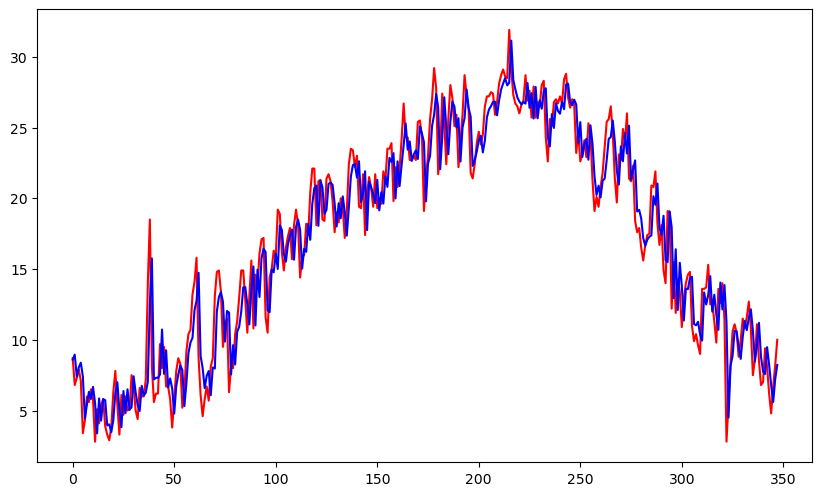

In [4]:

# 결과를 그래프로 그리기 ---(*5)
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test_y, c='r')
plt.plot(pre_y, c='b')
plt.savefig('weather-temp-lr.png')
plt.show()


In [5]:

# 오차 출력 ---(*6)
print(pre_y - test_y)
diff_y = abs(pre_y - test_y)
print("average=", sum(diff_y) / len (diff_y))
print("max=", max(diff_y))

[-0.10002007  2.15225572  0.10256015  0.15142234  1.28187488  4.01365434
  0.13671099 -0.56975101  0.72603441 -0.68140458  0.87244611  2.7607466
 -1.70903185  1.75737089 -1.11231561  0.01187698  1.83773828  0.65039859
  1.12591734 -0.32619115 -1.97861532 -1.57885621  1.59928286  1.72686513
 -2.27163088  1.68023609 -1.18539052  1.50001243 -0.05121848 -2.25973761
  0.72214703  1.27944462  0.98314343 -1.63017942  0.74598537  0.06470342
 -0.92896962 -6.94975005 -5.93966138  7.65213866  1.595504    1.11502761
  1.11392207 -2.14812766  2.7258388  -1.9074255   2.55773688 -0.06004565
  1.47215308  2.75437918 -1.01277685 -1.07156242 -1.15714278 -0.1103171
  2.66758147 -0.98676704 -2.27801803 -1.34517563 -0.89701271 -3.05874001
 -2.0044005  -3.03635208  6.03314611  2.75256234  3.40484054  0.78378786
  0.7571854   2.09606982 -2.02017163 -0.6575501  -5.12999152 -2.79552762
 -1.885336   -0.03289231  3.19409118 -1.127126    0.53537591  5.61959708
 -0.54903535  1.61963203 -2.1418707  -0.73748246 -2.0